In [1]:
import pandas as pd
import geopandas as gpd
import json
import matplotlib.pyplot as plt

## data file

In [3]:
df = pd.read_csv('../../data/pred_output_full.csv')

In [4]:
df.shape

(401, 176)

In [5]:
df.head(1)

,ags2,bundesland,ags5,kreis,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,...,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-30,2021-08-30
0,1,Schleswig-Holstein,1001,"Flensburg, Stadt",12.7,12.2,12.5,12.3,11.7,11.2,...,8.7,8.8,9.4,9.2,9.1,9.1,8.9,9.104045,8.927351,8.817409


In [6]:
# fix ags5 code to be len=5, add 0 at front
# df['ags5'] = gdf['krs_code']
def fix_ags5(x):
    if len(str(x))==4:
        return '0'+str(x)
    else:
        return str(x)
df['ags5_fix'] = df['ags5'].apply(fix_ags5)

## geo file

In [7]:
gdf = gpd.read_file('../../georef-germany-kreis/georef-germany-kreis-millesime.shp')

In [8]:
gdf.shape

(401, 9)

In [9]:
gdf.head(1)

,year,lan_code,lan_name,krs_code,krs_name,krs_area_c,krs_type,krs_name_s,geometry
0,2020,08,Baden-WÃ¼rttemberg,08211,"Flensburg, Stadt",DEU,Stadtkreis,Baden-Baden,"MULTIPOLYGON (((8.15840 48.84665, 8.15952 48.8..."


<AxesSubplot:>

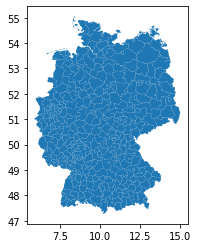

In [10]:
gdf.plot()

In [13]:
merged = pd.merge(df, gdf, left_on='ags5_fix', right_on='krs_code')

In [14]:
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

In [15]:
merged['longitude'] = merged['coords'].str[0]
merged['latitude'] = merged['coords'].str[1]

In [16]:
merged = gpd.GeoDataFrame(merged)

In [18]:
merged.head(1)

,ags2,bundesland,ags5,kreis,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,...,lan_name,krs_code,krs_name,krs_area_c,krs_type,krs_name_s,geometry,coords,longitude,latitude
0,1,Schleswig-Holstein,1001,"Flensburg, Stadt",12.7,12.2,12.5,12.3,11.7,11.2,...,Schleswig-Holstein,01001,Regionalverband Saarbrücken,DEU,Kreisfreie Stadt,Flensburg,"POLYGON ((9.49195 54.82264, 9.49230 54.82159, ...","(9.442473620308306, 54.788126184007176)",9.442474,54.788126


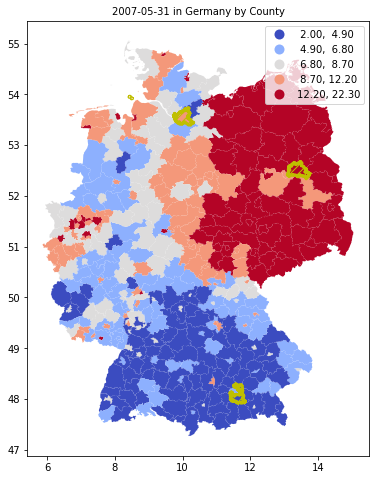

In [39]:
col = '2007-05-31'

fig, ax = plt.subplots(figsize=(15,8))

merged.plot(column=col, scheme="quantiles",
            ax=ax,
            cmap='coolwarm', legend=True)

kreise_list = ['Berlin', 'Hamburg', 'München, Kreis']

# highlight kreis

for kreis in kreise_list:
    merged[merged['kreis']==kreis].boundary.plot(ax=ax, color='y', linewidth=3, hatch="///")

# add text


# add text
# for i in merged.index:
#     ax.text(merged.longitude[i], merged.latitude[i],
#              f'{merged["kreis"][i]}\n{merged["kr_firm"][i]}', fontsize=10)

#plt.title(f'{col} in Germany by County',fontsize=15)
ax.set_title(f'{col} in Germany by County',fontsize=10)

plt.show()

In [19]:
ags2 = df['ags2'].unique()
bd = df['bundesland'].unique()

options = list()
for i in range(16):
    options.append(f'{ags2[i]} {bd[i]}')

In [20]:
options

['1 Schleswig-Holstein',
 '2 Hamburg',
 '3 Niedersachsen',
 '4 Bremen',
 '5 Nordrhein-Westfalen',
 '9 Freistaat Bayern',
 '6 Hessen',
 '7 Rheinland-Pfalz',
 '8 Baden-Württemberg',
 '10 Saarland',
 '11 Berlin',
 '12 Brandenburg',
 '13 Mecklenburg-Vorpommern',
 '14 Sachsen',
 '15 Sachsen-Anhalt',
 '16 Thüringen']